In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "../data/recent-data/"
import os
files = [os.path.join(DATA_DIR, f) for f in sorted(os.listdir(DATA_DIR))]
# Sorting Hack to put April Data before May
files = files[41:] + files[:41]
len(files)

158

In [3]:
counts = []
for idx, file in enumerate(files):
    with open(file) as f:
        c = json.load(f)['count']
#         print(idx, f)
        counts.append(c)

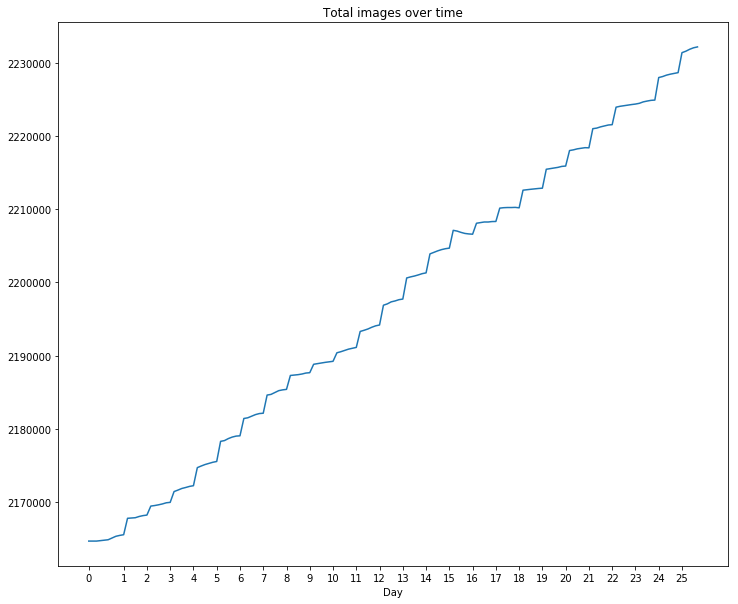

In [4]:
plt.figure(figsize=(12, 10))
plt.plot(counts)
plt.title("Total images over time")

# real data starts at index 9 onwards
plt.xticks([0] + list(range(9, 158, 6)), [0] + [i//6 for i in range(9, 158, 6)])
plt.xlabel("Day")
plt.show()

In [5]:
pull_counts = pd.read_csv("data.csv")

In [19]:
increasing_series = []
for idx, row in pull_counts.iterrows():
    obj = {}
    name = row[0]
    obj['name'] = name
    obj['data'] = list()
    for idx2, val in enumerate(row[1:]):
        if val > 0:
            obj['start_idx'] = min(obj.get('start_idx', 159), idx2)
#             print(obj['name'], obj['start_idx'])
            obj['data'].append(val)
            
    if len(obj['data']) > 10:
        increasing_series.append(obj)
with open("dumped.json", "w+") as f:
    json.dump(increasing_series, f)

In [7]:
real_change = []
print(len(increasing_series))
for obj in increasing_series[:]:
    if max(obj['data']) - min(obj['data']) > 0:
        real_change.append(obj)
print(len(real_change))

2048
1410


In [16]:
hq_plots = []
print(len(real_change))
for obj in real_change[:]:
    if len(obj['data']) > 50:
        hq_plots.append(obj)
print(len(hq_plots))

1410
184


In [10]:
plt.figure(figsize=(12, 10))
for idx, obj in enumerate(hq_plots[:]):
    plt.figure(idx, figsize=(12, 10))
    plt.plot(range(obj['start_idx'], 158), obj['data'], label = obj['name'])
    start_tick = obj['start_idx'] - (obj['start_idx'] % 6)
    plt.xticks(list(range(start_tick, 159, 6)), [i//6 for i in range(start_tick, 159, 6)])
    plt.xlabel("Day")
    plt.ylabel("Pull Count")
    plt.title(obj['name'])
    plt.savefig("../data/plots/0/" + "hq_plot_" + str(idx) + ".png")
    plt.close()

In [15]:
hq_plots2 = []
print(len(real_change))
for obj in real_change[:]:
    if len(obj['data']) > 50 and (max(obj['data']) - min(obj['data'])) > 100 and max(obj['data']) < 1000:
        hq_plots2.append(obj)
print(len(hq_plots2))

1410
18


In [13]:
hq_plots3 = []
print(len(real_change))
for obj in real_change[:]:
    if len(obj['data']) > 100 and (max(obj['data']) - min(obj['data'])) > 100:
        hq_plots3.append(obj)
print(len(hq_plots3))

1410
14


In [18]:
for idx, obj in enumerate(hq_plots[:]):
    plt.figure(idx, figsize=(12, 10))
    plt.plot(range(obj['start_idx'], 158), obj['data'], label = obj['name'])
    start_tick = obj['start_idx'] - (obj['start_idx'] % 6)
#     plt.xticks([0] + list(range(9, 158, 6)), [0] + [i//6 for i in range(9, 158, 6)])
    plt.xticks(range(start_tick, 158, 6), [i//6 - 1 for i in range(start_tick, 158, 6)])
    plt.xlabel("Day")
    plt.ylabel("Pull Count")
    plt.title(obj['name'])
#     plt.legend(bbox_to_anchor=(1.45,1), loc="upper right")
    plt.savefig("../data/plots/1/" + str(idx) + ".png")
    plt.close()

In [ ]:
for idx, obj in enumerate(hq_plots3[:]):
    plt.figure(idx, figsize=(12, 10))
    plt.plot(range(obj['start_idx'], 158), obj['data'], label = obj['name'])
    start_tick = obj['start_idx'] - (obj['start_idx'] % 6)
#     plt.xticks([0] + list(range(9, 158, 6)), [0] + [i//6 for i in range(9, 158, 6)])
    plt.xticks(range(start_tick, 158, 6), [i//6 - 1 for i in range(start_tick, 158, 6)])
    plt.xlabel("Day")
    plt.ylabel("Pull Count")
    plt.title(obj['name'])
#     plt.legend(bbox_to_anchor=(1.45,1), loc="upper right")
    plt.savefig("../data/plots/1/" + idx + ".png")
    plt.close()

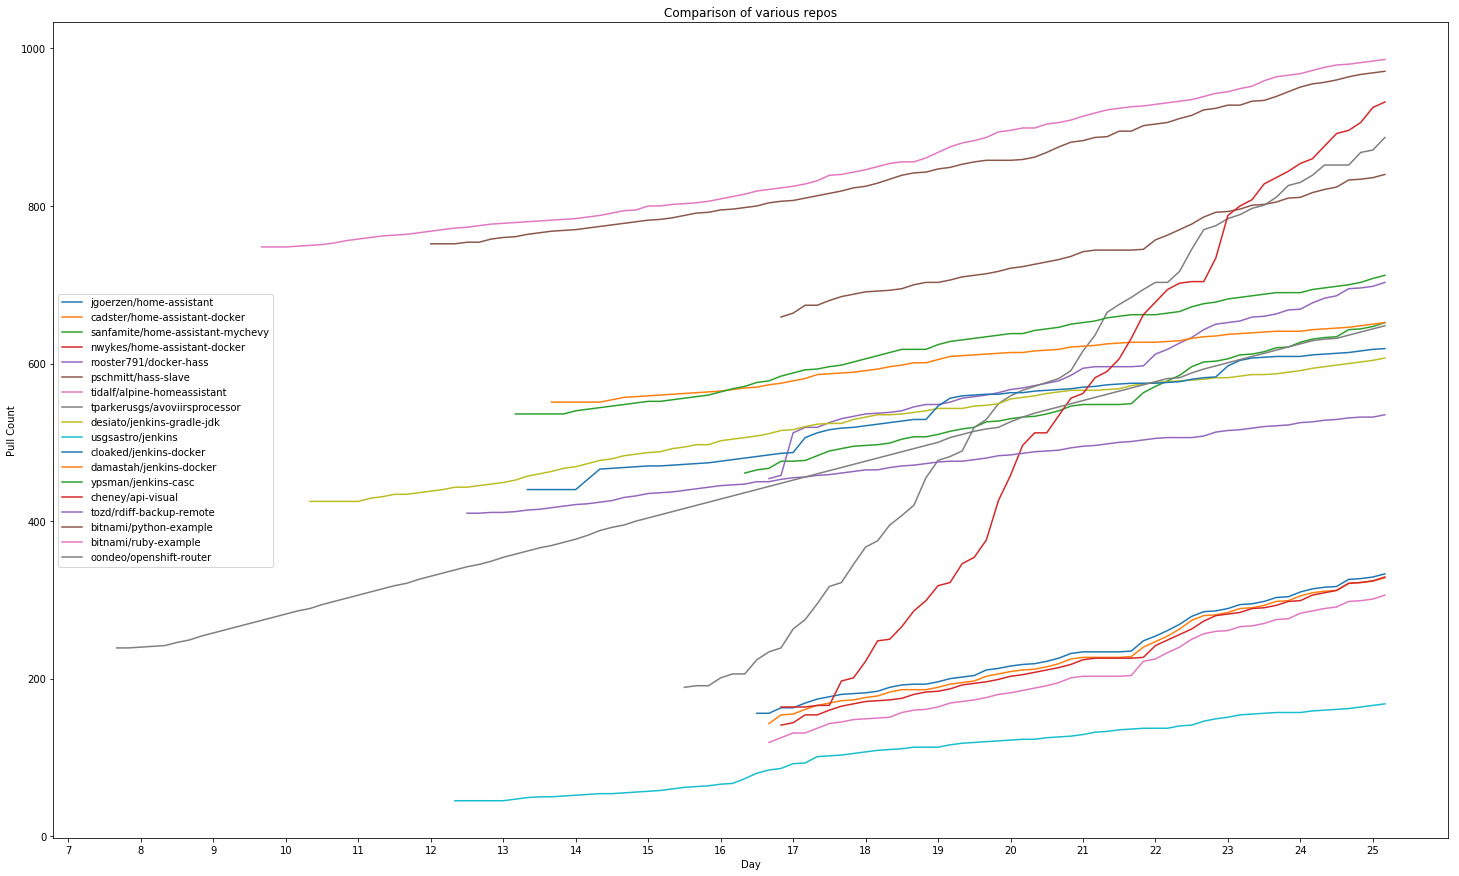

In [14]:
start_tick = 180
for idx, obj in enumerate(hq_plots2[:]):
    plt.figure(1, figsize=(25, 15))
    plt.plot(range(obj['start_idx'], 158), obj['data'], label = obj['name'])
    start_tick = min(start_tick, obj['start_idx'] - (obj['start_idx'] % 6))
#     plt.xticks([0] + list(range(9, 158, 6)), [0] + [i//6 for i in range(9, 158, 6)])
    plt.xticks(list(range(start_tick, 158, 6)), [i//6 - 1 for i in range(start_tick, 158, 6)])
    plt.xlabel("Day")
    plt.ylabel("Pull Count")
    plt.title('Comparison of various repos')
    plt.legend()
    plt.savefig("../data/plots/" + "compare.png")
#     plt.close()